## Final Project

2021-05-04  
Casey Ellis  
Meenu Ravi  
Kentaro Hama  

## Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sktime.forecasting.all import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss, adfuller

## Load data

In [3]:
df = pd.read_csv("updated_dataset.csv")
df.index = pd.date_range(min(df.ds), max(df.ds), freq = "MS")

## Initial EDA

In [4]:
display(df.drop("ds", axis=1))

,yosemite,sequoia,kings,gasoline (cpi),Temperature (F)
1979-01-01,72701,25338,19924,0.716,40.2
1979-02-01,72926,22334,18242,0.730,42.6
1979-03-01,87950,24271,18114,0.755,48.3
1979-04-01,136275,47410,37101,0.802,52.3
1979-05-01,210756,63854,63777,0.844,62.6
...,...,...,...,...,...
2019-08-01,703153,190139,113009,2.655,75.6
2019-09-01,584664,144639,81206,2.630,68.2
2019-10-01,448939,118187,55118,2.673,58.4
2019-11-01,230598,59502,25439,2.620,52.6


In [5]:
df.shape

(492, 6)

In [6]:
missing_values=df.isna().sum()
full=len(df)
percent=(missing_values/full)*100
percent

ds                 0.0
yosemite           0.0
sequoia            0.0
kings              0.0
gasoline (cpi)     0.0
Temperature (F)    0.0
dtype: float64

In [7]:
df.describe()

,yosemite,sequoia,kings,gasoline (cpi),Temperature (F)
count,492.000000,492.000000,492.000000,492.000000,492.000000
mean,289814.002033,83577.833333,58032.672764,1.808026,57.830894
std,180183.129118,57148.377017,44454.230843,0.871824,11.631980
min,12520.000000,14085.000000,7195.000000,0.716000,37.800000
25%,125888.250000,32574.500000,22009.000000,1.136000,47.375000
50%,246780.500000,62943.000000,42480.500000,1.363500,57.200000
75%,433387.000000,126007.500000,84080.000000,2.490250,69.250000
max,780728.000000,255984.000000,213332.000000,4.090000,79.100000


In [8]:
df.dtypes

ds                  object
yosemite             int64
sequoia              int64
kings                int64
gasoline (cpi)     float64
Temperature (F)    float64
dtype: object

In [9]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows: ", duplicate_rows.shape)

Duplicate rows:  (0, 6)


(array([], dtype=int64),)


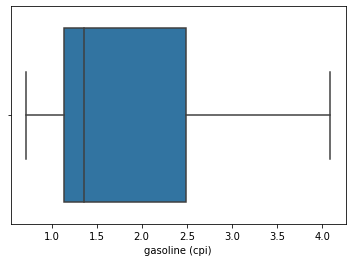

In [10]:
sns.boxplot(x=df['gasoline (cpi)'])
print(np.where(df['gasoline (cpi)']>df['gasoline (cpi)'].quantile(0.75) + (1.5 * (df['gasoline (cpi)'].quantile(0.75)-
                                                                  df['gasoline (cpi)'].quantile(0.25)))))

(array([], dtype=int64),)


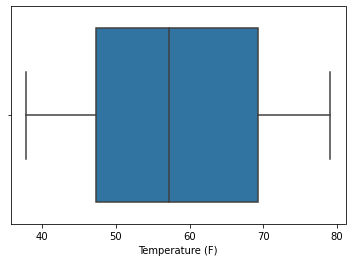

In [11]:
sns.boxplot(x=df['Temperature (F)'])
print(np.where(df['Temperature (F)']>df['Temperature (F)'].quantile(0.75) + (1.5 * (df['Temperature (F)'].quantile(0.75)-
                                                                  df['Temperature (F)'].quantile(0.25)))))

(array([], dtype=int64),)


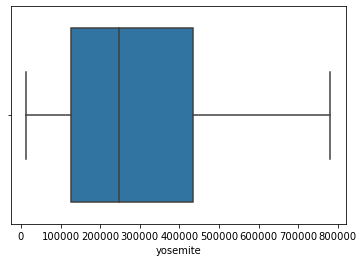

In [12]:
sns.boxplot(x=df['yosemite'])
print(np.where(df['yosemite']>df['yosemite'].quantile(0.75) + (1.5 * (df['yosemite'].quantile(0.75)-
                                                                  df['yosemite'].quantile(0.25)))))

(array([], dtype=int64),)


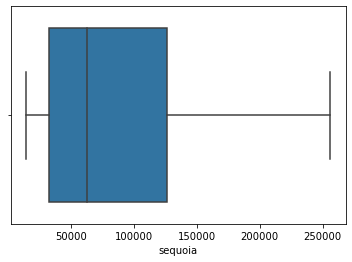

In [13]:
sns.boxplot(x=df['sequoia'])
print(np.where(df['sequoia']>df['sequoia'].quantile(0.75) + (1.5 * (df['sequoia'].quantile(0.75)-
                                                                  df['sequoia'].quantile(0.25)))))

(array([ 19,  42,  43,  55,  90,  91, 102, 103, 114, 115, 127, 138, 139,
       150, 151], dtype=int64),)


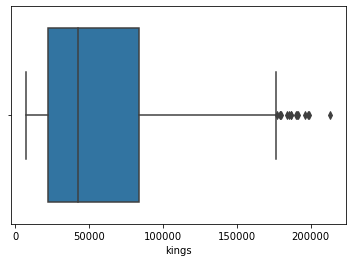

In [14]:
sns.boxplot(x=df['kings'])
print(np.where(df['kings']>df['kings'].quantile(0.75) + (1.5 * (df['kings'].quantile(0.75)-
                                                                  df['kings'].quantile(0.25)))))

<AxesSubplot:>

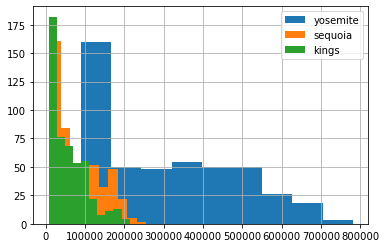

In [15]:
df["yosemite"].hist(legend=True)
df["sequoia"].hist(legend=True)
df["kings"].hist(legend=True)

<AxesSubplot:>

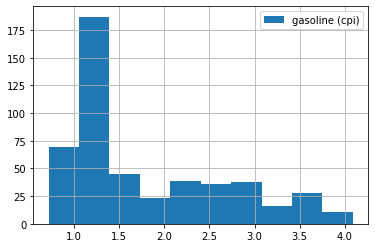

In [16]:
df["gasoline (cpi)"].hist(legend=True)
# df["kings"].hist(legend=True)

<AxesSubplot:>

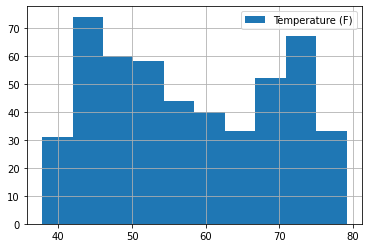

In [17]:
df["Temperature (F)"].hist(legend=True)


## EDA

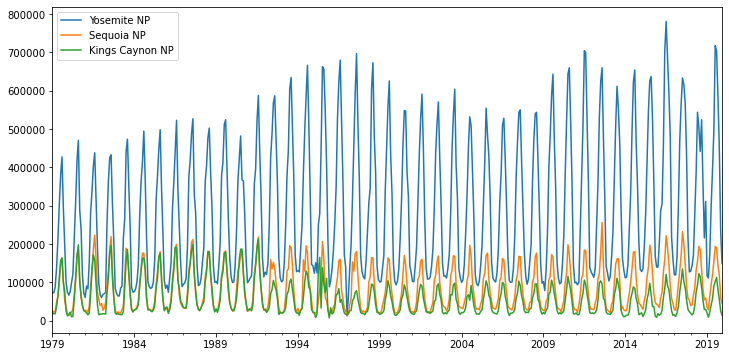

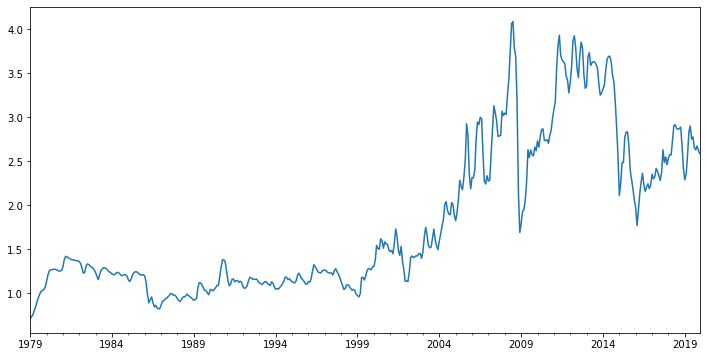

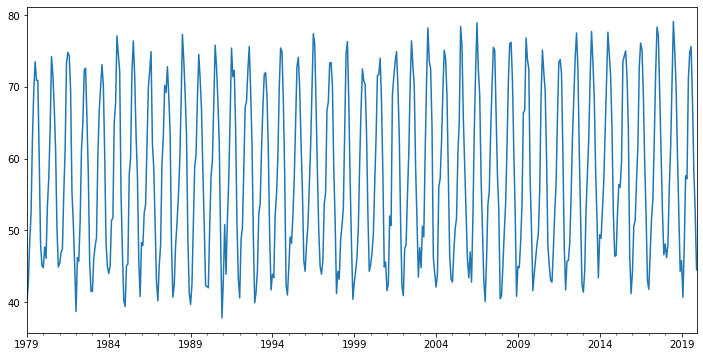

In [18]:
plt.figure(figsize=[12,6])
df["yosemite"].plot()
df["sequoia"].plot()
df["kings"].plot()
plt.legend(["Yosemite NP", "Sequoia NP", "Kings Caynon NP"])
plt.show()

plt.figure(figsize=[12,6])
df["gasoline (cpi)"].plot()
plt.show()

plt.figure(figsize=[12,6])
df["Temperature (F)"].plot()
plt.show()

,yosemite,sequoia,kings,gasoline (cpi),Temperature (F)
yosemite,1.00,0.92,0.74,0.20,0.93
sequoia,0.92,1.00,0.86,0.12,0.92
kings,0.74,0.86,1.00,-0.12,0.81
gasoline (cpi),0.20,0.12,-0.12,1.00,0.12
Temperature (F),0.93,0.92,0.81,0.12,1.00


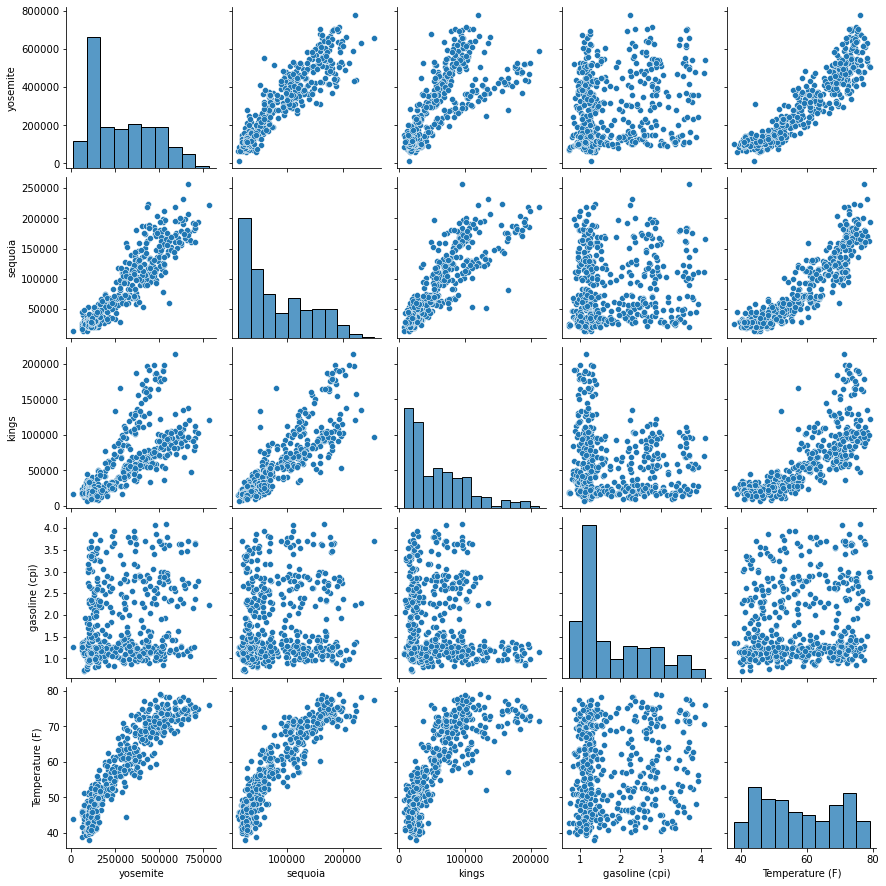

In [19]:
cor_data = df
display(round(cor_data.corr(), 2))
sns.pairplot(df)
plt.show()

In [20]:
df["yosemite_seasdiff"] = df["yosemite"].diff(12)
df["sequoia_seasdiff"] = df["sequoia"].diff(12)
df["kings_seasdiff"] = df["kings"].diff(12)

## Heirarchical Model

In [21]:
import hts

In [22]:
# states = df["state"].unique()
counties = ['Mariposa','Tulare']
parks=['Yosemite','Sequoia','Kings']
total = {'total': list(counties)}
state = {}
state['Mariposa']=['Yosemite']
state['Tulare']=['Sequoia','Kings']
hierarchy = {**total, **state}

hierarchy

{'total': ['Mariposa', 'Tulare'],
 'Mariposa': ['Yosemite'],
 'Tulare': ['Sequoia', 'Kings']}

In [23]:
hierarchy_df=pd.DataFrame()
hierarchy_df['Yosemite']=df['yosemite']
hierarchy_df['Sequoia']=df['sequoia']
hierarchy_df['Kings']=df['kings']
hierarchy_df['Mariposa']=df['yosemite']
hierarchy_df['Tulare']=df['sequoia']+df['kings']
hierarchy_df['total']=hierarchy_df['Mariposa']+hierarchy_df['Tulare']
hierarchy_df

,Yosemite,Sequoia,Kings,Mariposa,Tulare,total
1979-01-01,72701,25338,19924,72701,45262,117963
1979-02-01,72926,22334,18242,72926,40576,113502
1979-03-01,87950,24271,18114,87950,42385,130335
1979-04-01,136275,47410,37101,136275,84511,220786
1979-05-01,210756,63854,63777,210756,127631,338387
...,...,...,...,...,...,...
2019-08-01,703153,190139,113009,703153,303148,1006301
2019-09-01,584664,144639,81206,584664,225845,810509
2019-10-01,448939,118187,55118,448939,173305,622244
2019-11-01,230598,59502,25439,230598,84941,315539


In [24]:
hierarchy_df['gasoline (cpi)']=df['gasoline (cpi)']
hierarchy_df

,Yosemite,Sequoia,Kings,Mariposa,Tulare,total,gasoline (cpi)
1979-01-01,72701,25338,19924,72701,45262,117963,0.716
1979-02-01,72926,22334,18242,72926,40576,113502,0.730
1979-03-01,87950,24271,18114,87950,42385,130335,0.755
1979-04-01,136275,47410,37101,136275,84511,220786,0.802
1979-05-01,210756,63854,63777,210756,127631,338387,0.844
...,...,...,...,...,...,...,...
2019-08-01,703153,190139,113009,703153,303148,1006301,2.655
2019-09-01,584664,144639,81206,584664,225845,810509,2.630
2019-10-01,448939,118187,55118,448939,173305,622244,2.673
2019-11-01,230598,59502,25439,230598,84941,315539,2.620


In [25]:
exogenous = {k: ['gasoline (cpi)'] for k in hierarchy_df.columns if k not in ['gasoline (cpi)']}
exogenous

{'Yosemite': ['gasoline (cpi)'],
 'Sequoia': ['gasoline (cpi)'],
 'Kings': ['gasoline (cpi)'],
 'Mariposa': ['gasoline (cpi)'],
 'Tulare': ['gasoline (cpi)'],
 'total': ['gasoline (cpi)']}

In [26]:
from hts.hierarchy import HierarchyTree

ht = HierarchyTree.from_nodes(nodes=hierarchy, df=hierarchy_df,exogenous=exogenous)
ht

# exogenous (Dict[str, List[str]] or None) – Node key mapping to columns that contain the exogenous variable for that node

- total
   |- Mariposa
   |  - Yosemite
   - Tulare
      |- Sequoia
      - Kings

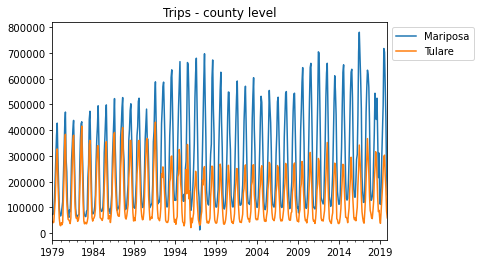

In [27]:
ax = hierarchy_df[hierarchy['total']].plot(title="Trips - county level")
ax.legend(bbox_to_anchor=(1.0, 1.0));

In [28]:
y_train = hierarchy_df[:-12]
y_test = hierarchy_df[-12:]

In [29]:
# exo={}
# exo['Mariposa']=['Mariposa gasoline (cpi)']
# exo['Tulare']=['Tulare gasoline (cpi)']
exogenous_df =pd.DataFrame()
exogenous_df ['gasoline (cpi)']=df['gasoline (cpi)'][-12:]
# exogenous_df['Tulare gasoline (cpi)']=df['gasoline (cpi)'][-12:]
# exogenous_df['total']=y_test['total']
# exogenous_df.index=y_test.index

# exogenous_df = exogenous_df.rename_axis(None)
exogenous_df 
# print(type(exogenous_df))

,gasoline (cpi)
2019-01-01,2.289
2019-02-01,2.353
2019-03-01,2.564
2019-04-01,2.835
2019-05-01,2.901
2019-06-01,2.752
2019-07-01,2.776
2019-08-01,2.655
2019-09-01,2.630
2019-10-01,2.673


In [30]:
model_td_arima = hts.HTSRegressor(model='auto_arima', revision_method='AHP', n_jobs=0)
model_td_arima = model_td_arima.fit(y_train, hierarchy)
# pred_td_arima = model_td_arima.predict(exogenous_df=exo_test ,steps_ahead=12)

Fitting models: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:46<00:00, 17.81s/it]


In [33]:
pred_td_arima = model_td_arima.predict(steps_ahead=12)

Fitting models:   0%|                                                                                                                                                 | 0/6 [00:00<?, ?it/s]C:\Users\meenu\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\meenu\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
C:\Users\meenu\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.

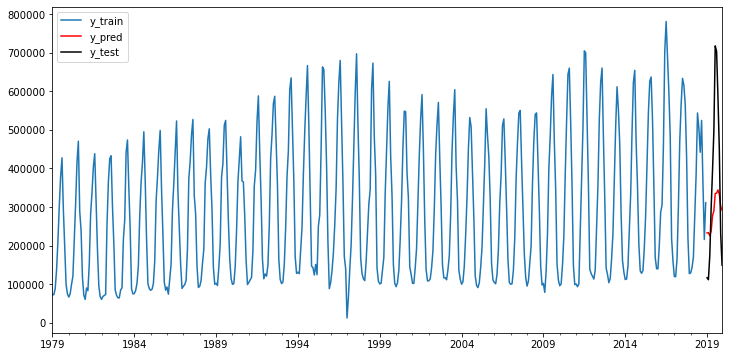

In [32]:
# plot_results(pred_td_arima, hierarchy_df, cols_to_plot=['Yosemite'])
plt.figure(figsize=[12,6])
y_train["Yosemite"].plot()
pred_td_arima['Yosemite'][-12:].plot(color='red')
y_test["Yosemite"].plot(color = 'black')
plt.xlabel("")
plt.legend(["y_train", "y_pred", "y_test"], loc = "upper left")
plt.show()

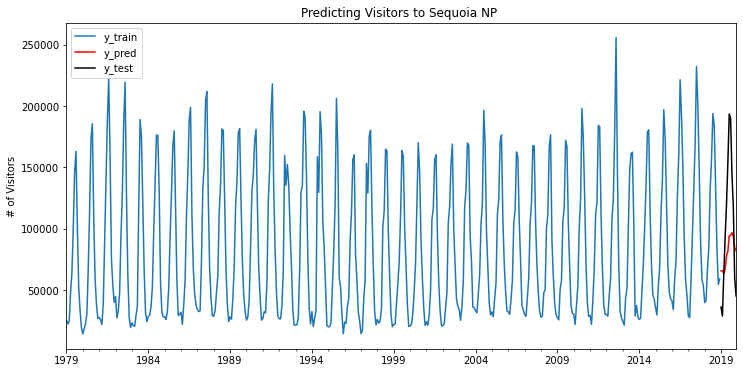

In [36]:
plt.figure(figsize=[12,6])
y_train["Sequoia"].plot()
pred_td_arima['Sequoia'][-12:].plot(color='red')
y_test["Sequoia"].plot(color = 'black')
plt.ylabel("# of Visitors")
plt.title("Predicting Visitors to Sequoia NP ")
plt.legend(["y_train", "y_pred", "y_test"], loc = "upper left")
plt.show()


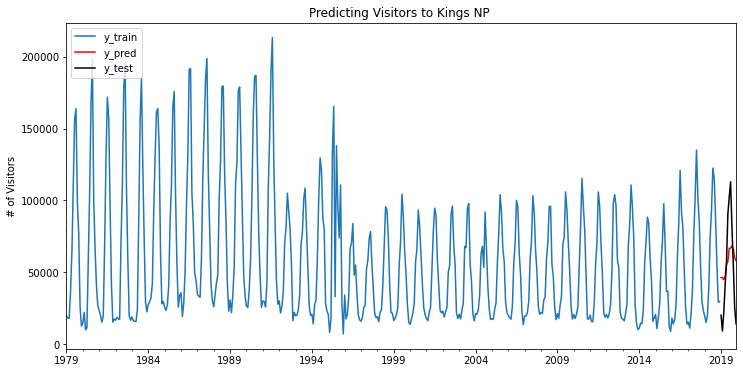

In [37]:
plt.figure(figsize=[12,6])
y_train["Kings"].plot()
pred_td_arima['Kings'][-12:].plot(color='red')
y_test["Kings"].plot(color = 'black')
plt.ylabel("# of Visitors")
plt.title("Predicting Visitors to Kings NP ")
plt.legend(["y_train", "y_pred", "y_test"], loc = "upper left")
plt.show()

In [37]:
def mape_loss(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def MASE(y_train, y_test, y_pred):
    n = y_train.shape[0]
    d = np.abs(np.diff(y_train) ).sum()/(n-1)  
    errors = np.abs(y_test - y_pred)
    return errors.mean()/d

def model_eval(y_train, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mape_loss(y_test, y_pred)
    smape = smape_loss(y_test, y_pred)
    mase = MASE(y_train, y_test, y_pred)
    print(f'mae: {mae}')
    print(f'mse: {mse}')
    print(f'mape: {mape}')
    print(f'smape: {smape}')
    print(f'mase: {mase}') 

In [41]:
model_eval(y_train['Yosemite'],y_test['Yosemite'],pred_td_arima['Yosemite'][-12:])

mae: 165990.97049945433
mse: 39046802789.75124
mape: 52.38140968876718
smape: 0.49058362909572706
mase: 2.043791105579031


In [42]:
model_eval(y_train['Sequoia'],y_test['Sequoia'],pred_td_arima['Sequoia'][-12:])

mae: 44727.773977999255
mse: 2820979860.5141673
mape: 50.05394723403763
smape: 0.47121990322325685
mase: 1.6211745992663487


In [43]:
model_eval(y_train['Kings'],y_test['Kings'],pred_td_arima['Kings'][-12:])

mae: 25976.949474879133
mse: 877790478.4270115
mape: 103.98703579216597
smape: 0.5614907035230289
mase: 1.2890892831671303
